# PCA Project HW- Red and White Wine Combined Datasets
## Mohamed R Helayhel
1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using PCA, data cleaning, data standardization, and dealing with outlier values.
4. Split the data into Train and Test and build and evaluate the first Model
5. Perform Model Improvement techniques and predict Test Data
6. Choose the best model and discuss the results.

In [1]:
#Import required packages
import numpy as np
import numpy.matlib as npmtlb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

## 1-Define the Research problem and questions
The Dataset was retrieved from UCI Machine Learning Repository (Link: https://archive.ics.uci.edu/ml/datasets/wine+quality)

### Description
#### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine, reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

#### These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Question to answer
##### Use the all or some of the attributes to determine the whether it is Red Wine or White Wine. (Classification)
##### Red Wine will be class 0 and White Wine will be class 1


In [2]:
# Read the data, print the shape and first 5 rows.
wineQualityRed = pd.read_csv("winequality-red.csv",sep=';', engine='python')
wineQualitywhite = pd.read_csv("winequality-white.csv",sep=';', engine='python')
print('Red Wine:',wineQualityRed.shape)
print(wineQualityRed.head())

print('White Wine:',wineQualitywhite.shape)
print(wineQualitywhite.head())

frames=[wineQualityRed,wineQualitywhite]
wineDataset = pd.concat(frames)

print('All Wines:',wineDataset.shape)
print(wineDataset.head())

Red Wine: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  

In [3]:
#Add class column for color, where Red Color is 0 and White Color is 1
redWineColor=npmtlb.repmat(0,1599,1)
whiteWineColor=npmtlb.repmat(1,4898,1)
color=np.concatenate((redWineColor[:,0],whiteWineColor[:,0]))
wineDataset['color'] = color.tolist()
print(wineDataset.shape)
print(wineDataset.head(-1))

(6497, 13)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4892            6.5              0.23         0.38             1.3      0.032   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   

      free sulfu

## Comments
#### The data includes thirteen variables, where 12 are to be used as predictors and the 'color' is the output. We see that there are about 4x as many red white wine observations when compared to white wine, so balancing the data will be critical to avoid underfitting the model

## 2-Analyze data by descriptive statistics and graphical visualization.

In [4]:
# Print the summary of the data

print(wineDataset.describe())
print(wineDataset.describe().T)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [5]:
# Print the datatypes which are keys.
types = wineDataset.dtypes
print(types)
print("Keys of wine color dataset:\n", wineDataset.keys())

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                     int64
dtype: object
Keys of wine color dataset:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


In [6]:
# print the target variable
# Labels: 0 as red, 1 is white.
print("color:", wineDataset['color'])

color: 0       0
1       0
2       0
3       0
4       0
       ..
4893    1
4894    1
4895    1
4896    1
4897    1
Name: color, Length: 6497, dtype: int64


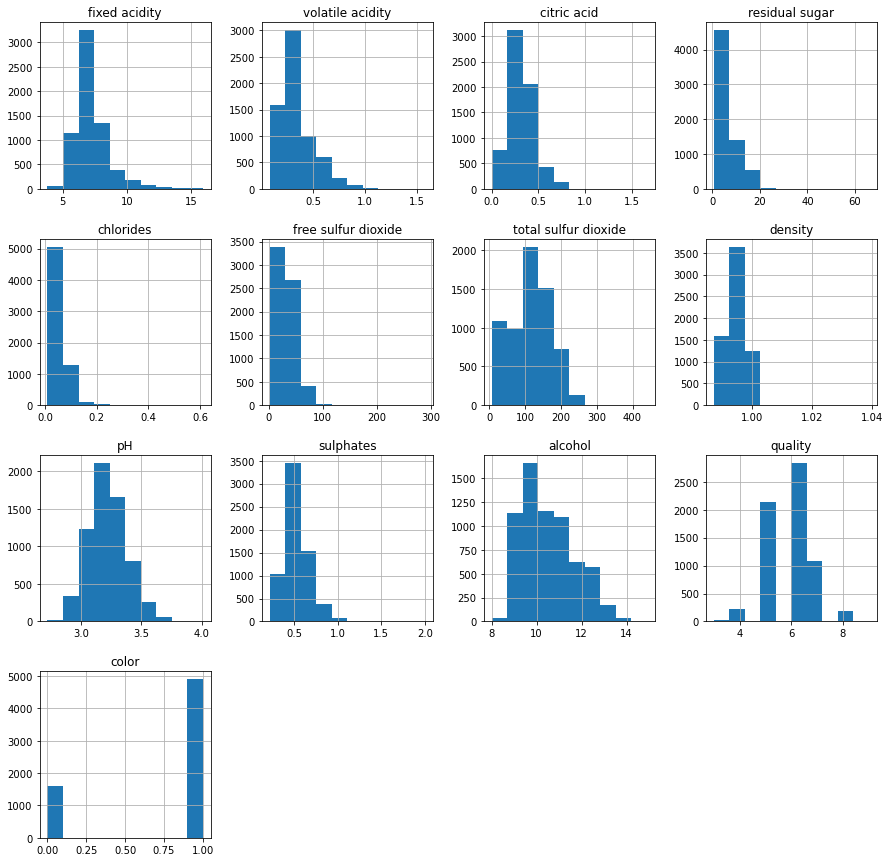

In [7]:
# Create the histogram of all the variables.

%matplotlib inline
wineDataset.hist(figsize = (15,15))
plt.show()

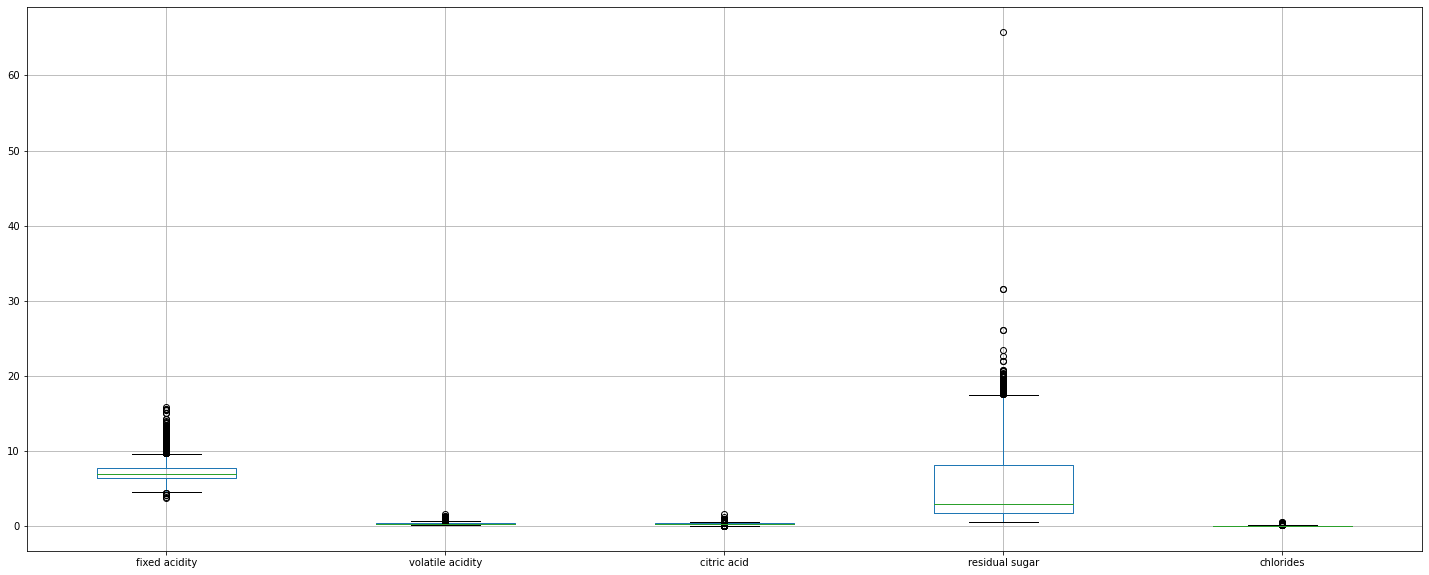

In [8]:
# create a grid of boxplot
%matplotlib inline
X=wineDataset.iloc[:,0:12]
y = wineDataset.iloc[:,12]
colX=list(wineDataset.columns)
boxplot = wineDataset.boxplot(column=colX[0:5],figsize = (25,10))

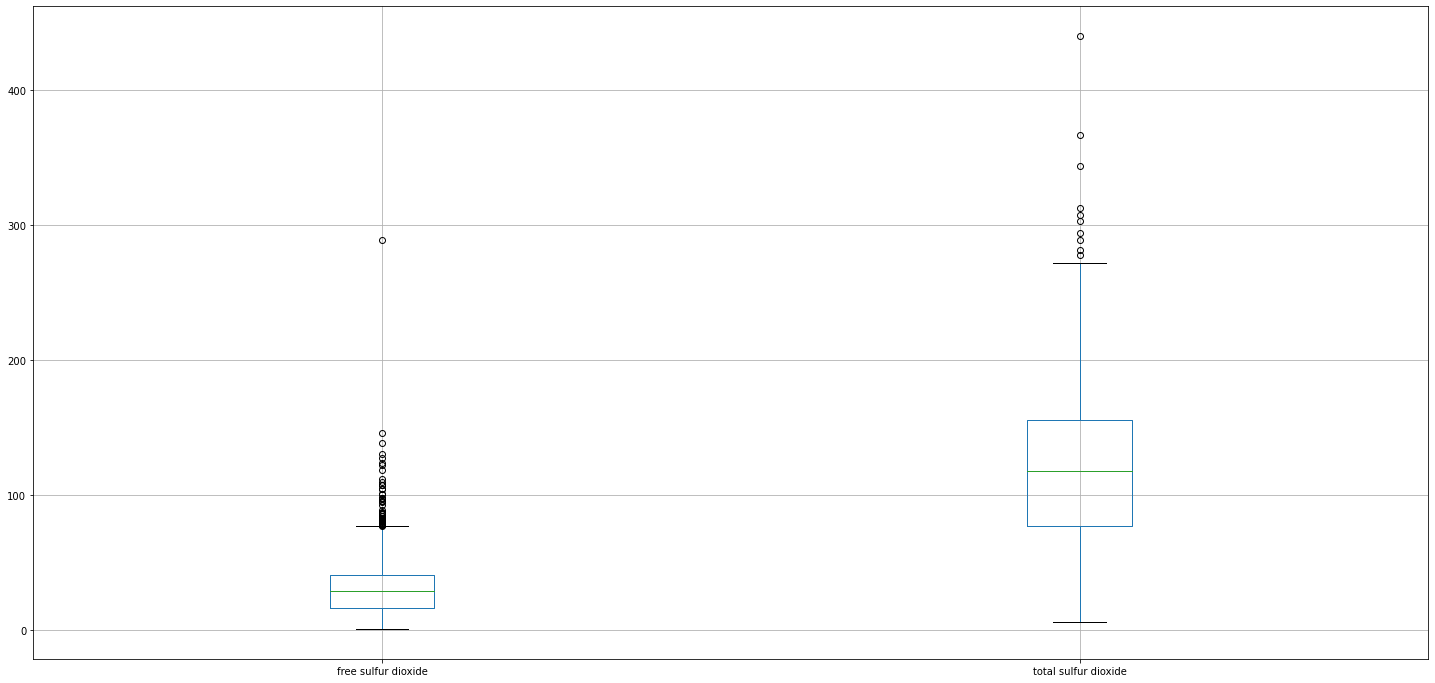

In [9]:
Secondboxplot = wineDataset.boxplot(column=colX[5:7],figsize = (25,12))

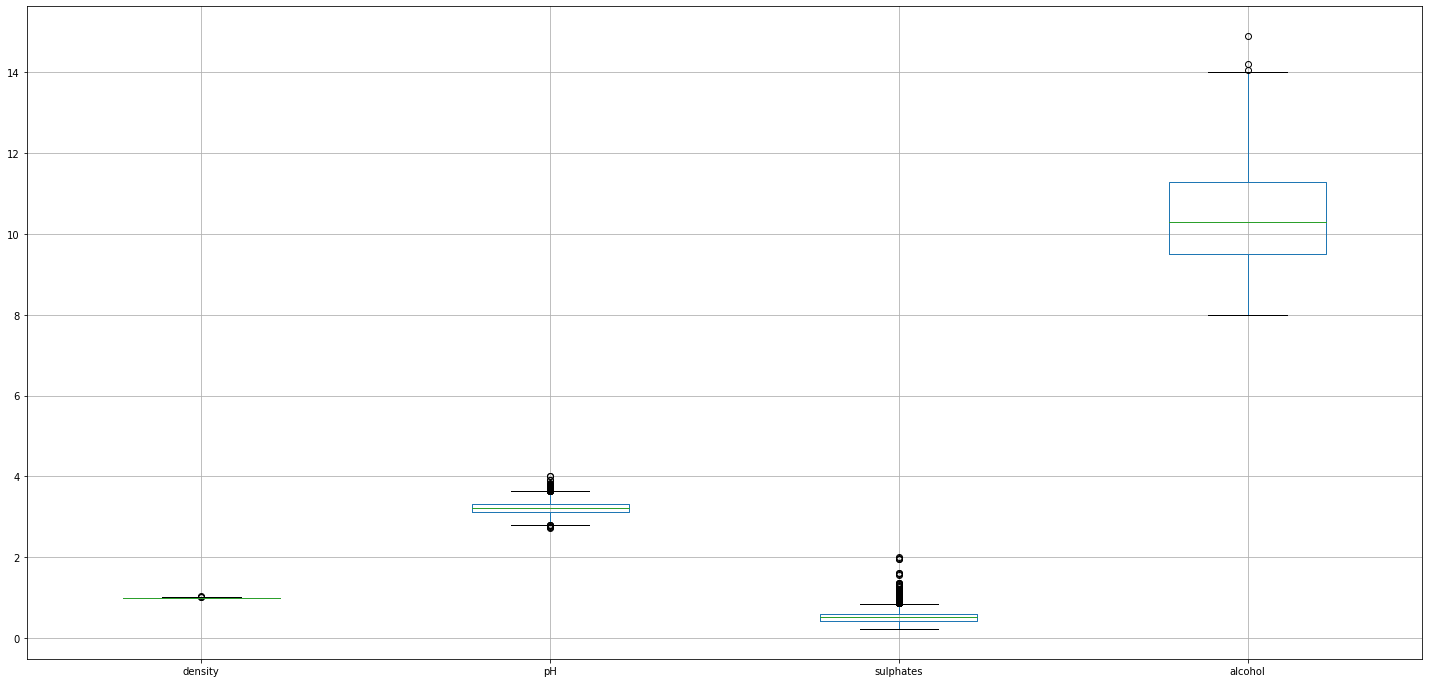

In [10]:
Thirdboxplot = wineDataset.boxplot(column=colX[7:11],figsize = (25,12))

<AxesSubplot:>

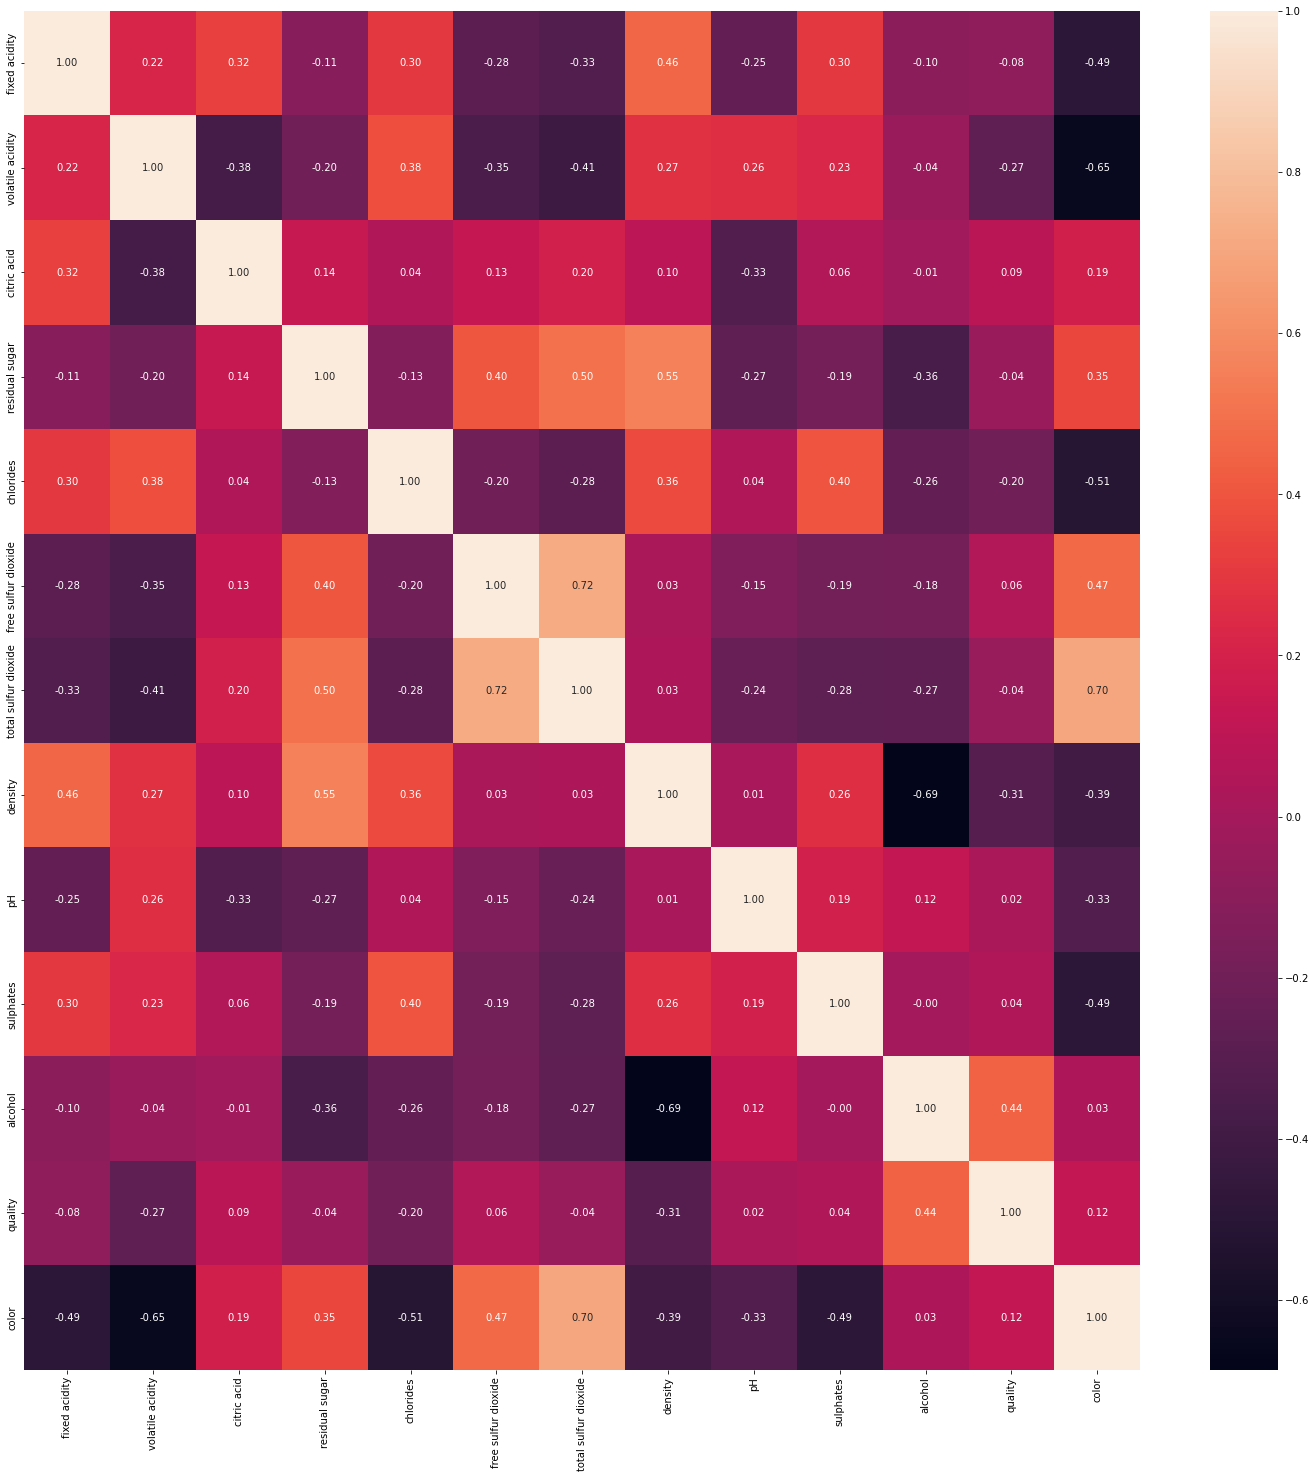

In [11]:
# Viewing Correlation coefficients using a heatmap
plt.figure(figsize=(25,25))
sns.heatmap(wineDataset.corr(),annot=True,fmt='.2f')

## Comments
#### Looking at the historgram of all the variables. We see that that most do not have a normal distrubition. And the boxplots show that most predictor variables include outliers, however decisition trees do not make assumptions about data distribution, which makes it a good model to use for this classification work
#### We also see using the pearson correlation matrix that several of our predictor features are correlated weakly, moderately and strongly, therefore using Random Forest might improve the model accuracy since it eliminates issues that arise with structural similarities across models results which happen with greedy algorithms (and bagging) and they end up generating predictions that have high correlation.  Random Forest eliminates this by creating submodels whose predictions/classifications are not correlated or are atmost weakly correlated, therefore generating a better and unbiased overall prediction.


## 3- Prepare data

In [12]:
# Divide data into predictor features vector and the label of the trget variable 'Risk'

X = wineDataset
X = X.iloc[:,0:12]
y = wineDataset['color']
#print(X)
#print(y)

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4-Train and Test Data 

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier

# Creating an instance of the Decision Tree
tree = DecisionTreeClassifier(random_state=0)
# Fiting the training data to the model
tree.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.985


In [14]:
# Improving the Decision Tree accuracy by increasing the depth.
tree = DecisionTreeClassifier(max_depth=7, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.988


## 6- Evaluate the performance of the first model


## Comments
#### We see that even with our first model we get a test accuracy of 98.5% which gives confidence that our model is accurately predicting the color of the wine using the input provided. However, we also see that the training accuracy is 100% which means that the model could be overfitting, and we need to be careful about this especially since we have an unbalanced class variable
#### We notice that increasing the depth from the default value increased the test accuracy by .3% and brought the training accuracy closer to the test accuracy, which gives could confidence going into the tuning section that we could even higher accuracy to make it a near perfect model

## 7- Feature importance and techniques to improve the model performance

### 7-A Feature Importance and Selection

Feature importances:
[0.04207261 0.01954805 0.00169928 0.00769429 0.20752844 0.00293327
 0.68012384 0.01983881 0.00700914 0.00928878 0.00127226 0.00099124]
12


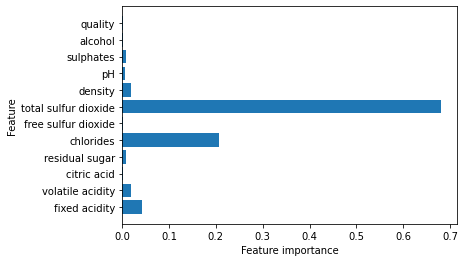

In [15]:
print("Feature importances:")
print(tree.feature_importances_)
# Creating a function to generate feature importance and plot it.

def plot_feature_importances_heartattack(model):
# extractibg the number of predictive feature variables(columns)
    n_features = X.shape[1]
    print(n_features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
# Calling the function to extract feature importance and passing the model named tree (constructed earlier) into it.

plot_feature_importances_heartattack(tree)

In [16]:
X = wineDataset
X = wineDataset[['total sulfur dioxide','chlorides','fixed acidity','volatile acidity']]
y = wineDataset['color']
#print(X)
#print(y)

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
tree = DecisionTreeClassifier(max_depth=7, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.981


## Comments
#### This shows that we have most categories barely contributing to the model while others have no impact at all, as the model prediction is heavily reliant on total sulfur dioxide and chlorides. Therefore, we built the same model with the top four features in the list to produce a more computionally efficient model which gave close accuracy to the ones using all features. We will try optimize this one insteada going forward

### 7- B Boosting and Random Forest

In [17]:
from sklearn.ensemble import GradientBoostingClassifier 
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.980
Accuracy on test set: 0.979


In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

from sklearn.ensemble import GradientBoostingClassifier 

# Creating an instance of the Gradient Boosting Classifier and varying parameters.
gbrt = GradientBoostingClassifier(n_estimators=200,max_depth=7,learning_rate=0.03,random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.982


In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# StratifiedKFold is a variation of k-fold which returns stratified folds: each set 
# contains approximately the same percentage of samples of each target class as the complete set.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)
# number of trees =100, maximum depth = 7
forest = RandomForestClassifier(max_depth=7,n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.990


## Comments
#### As predicted in the descriptive statistics commentary, Random Forest did improve test accuracy for this model by almost 1%, bringing it closer to the training accuracy, while boosting could not match this test accuracy
#### This effect was expected since Random Forest eliminates issues that arise with structural similarities across models results which happen with greedy algorithms and they end up generating predictions that have high correlation.  Random Forest eliminates this by creating submodels whose predictions/classifications are not correlated or are atmost weakly correlated, therefore generating a better and unbiased overall prediction.  Random Forest eliminates this by creating submodels whose predictions/classifications are not correlated or are atmost weakly correlated, therefore generating a better and unbiased overall prediction.

### 7-C Algorithm Comparison

In [20]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Algorithms
models = []
models.append(( 'Naive Bayes' , GaussianNB()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'Decision Tree' , DecisionTreeClassifier()))
models.append(( 'RandomForestClassifier' , RandomForestClassifier()))
models.append(( 'MLPClassifier' , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=347288723)))

# Test options and evaluation metric
seed = 347288723 
print('Wine dataset:\n')
# Create a list save results
results = []
# Create a list ot save model names
names = []
for name, model in models:
# create a kfold cross fold validation with 10 splits
  models_kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
 # passing each model into the cross validation for training
  cv_results = cross_val_score(model, X_train, np.ravel(y_train), cv=models_kfold)
 # passing each model into the cross validation for testing
  cv_results_testing = cross_val_score(model, X_test, np.ravel(y_test), cv=models_kfold)
 # Save the results 
  results.append(cv_results)
 # Save the names
  names.append(name)
 # Print the results
  msg = "Training accuracy %s: %f %%" % (name, cv_results.mean()*100)
  print(msg)
  msg_testing = "Testing accuracy %s: %f %%" % (name, cv_results_testing.mean()*100)
  print(msg_testing)
print('10-Fold cross-validation accuracy score applied for the training data for 5 classifiers')

Wine dataset:

Training accuracy Naive Bayes: 95.381812 %
Testing accuracy Naive Bayes: 95.508218 %
Training accuracy KNN: 93.801040 %
Testing accuracy KNN: 92.246459 %
Training accuracy Decision Tree: 98.152456 %
Testing accuracy Decision Tree: 98.153829 %
Training accuracy RandomForestClassifier: 98.788880 %
Testing accuracy RandomForestClassifier: 98.892676 %
Training accuracy MLPClassifier: 96.839045 %
Testing accuracy MLPClassifier: 97.723245 %
10-Fold cross-validation accuracy score applied for the training data for 5 classifiers


## Comments
#### We notice that the Random Forest classifiers, although less optimized than the in section 7-B, still provided the highest cross-validated training accuracy when compared to all the other classifiers used. This gives us confidence in the validity of the results we got above and invites futher optimization techniques for targeted for RandomForest
#### We also notice that KNN has the lowest accuracy for this dataset, which is not surprising given the high presence of outliers we saw in the box and whisker plots above. 
#### The second lowest cross validated accuracy results come from Naive Bayes, which assume that the predictors are independent and we saw multi-collinearity in our correlation matrix, so this is also not a surprising outcome

### 7-D Outlier Elimination

In [21]:
#filtered Winedata set based on Z score (all data in parameters should be within 3 std devs of their respective mean)
from scipy import stats
filteredWineDataset=wineDataset[((np.abs(stats.zscore(wineDataset))) < 3).all(axis=1)]
print(filteredWineDataset.shape)

(5989, 13)


In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
X = filteredWineDataset
X = filteredWineDataset[['total sulfur dioxide','chlorides','fixed acidity','volatile acidity']]
y = filteredWineDataset['color']

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# StratifiedKFold is a variation of k-fold which returns stratified folds: each set 
# contains approximately the same percentage of samples of each target class as the complete set.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)
# number of trees =100, maximum depth = 7
forest = RandomForestClassifier(max_depth=7,n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.984


## Comments
#### We notice that Random Forest test accuracy did not improve with the elimination of outliers, although the training accuracy did improve slightly. This is a result that is not surprising, since the outlier elimination improves correlation accross features which coulf have contributed to the improvement in the training accuracy increase. But it deteriorated the test set accuracy, which might be due to the an already unbalanced class output losing more of its observations which contributed negatively in this case.
#### This shows that elimination of outliers is not always the best path forward.

## 8- Choosing the Best Model
 

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

X = wineDataset
X = wineDataset[['total sulfur dioxide','chlorides','fixed acidity','volatile acidity']]
y = wineDataset['color']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)
# define in the parameter values that should be search
# create a parameter grid:  map the parameter names to the value that should be search
param_grid = {
  'n_estimators': [ 25, 50, 100, 120, 150, 300],
  'max_features': ['auto', 'sqrt', 'log2']
}

# use out-of-bag samples ("oob_score= True") to estimate the generalization accuracy.
rfc = RandomForestClassifier(bootstrap= True, n_jobs=-1, oob_score= True)

# cv=10 in the GridSearchCV and initialize the grid
grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv=10, scoring ='accuracy')

# fit your data before you can get the best parameter combination.
grid_rfc.fit(X_train,y_train)
grid_rfc.cv_results_

{'mean_fit_time': array([0.38199389, 0.16148028, 0.29390347, 0.36193697, 0.4450484 ,
        1.00720787, 0.09686909, 0.15841463, 0.2925765 , 0.42663269,
        0.7036783 , 0.93230214, 0.08674202, 0.26161151, 0.30466998,
        0.39403565, 0.53779047, 0.86940434]),
 'std_fit_time': array([0.90122728, 0.02255778, 0.00635635, 0.0170631 , 0.01654625,
        0.33714906, 0.00624956, 0.00728709, 0.00665455, 0.12364259,
        0.1675669 , 0.06684428, 0.01066073, 0.09620175, 0.02543231,
        0.09165421, 0.08483986, 0.0460951 ]),
 'mean_score_time': array([0.01406126, 0.01562455, 0.03126683, 0.03327732, 0.04374595,
        0.10169351, 0.01406052, 0.02031124, 0.03124421, 0.04703152,
        0.09866252, 0.08413398, 0.01461658, 0.02966404, 0.03124399,
        0.04217529, 0.05420098, 0.08428271]),
 'std_score_time': array([4.68708698e-03, 3.85538398e-06, 6.30975749e-05, 5.08838270e-03,
        6.24892727e-03, 4.74024071e-02, 4.68684090e-03, 7.16000934e-03,
        7.67400485e-06, 2.01149752e-

In [24]:
# Best Model from Grid Search

print("GridSearhCV best model:\n ")
print('The best score: ', grid_rfc.best_score_)
print('The best parameter:', grid_rfc.best_params_)
print('The best model estimator:', grid_rfc.best_estimator_)

GridSearhCV best model:
 
The best score:  0.989326168916417
The best parameter: {'max_features': 'sqrt', 'n_estimators': 50}
The best model estimator: RandomForestClassifier(max_features='sqrt', n_estimators=50, n_jobs=-1,
                       oob_score=True)


Accuracy on  RandomForest Classifier test data: 99.14 %
Confusion Matrix 
 [[ 395    5]
 [   9 1216]]


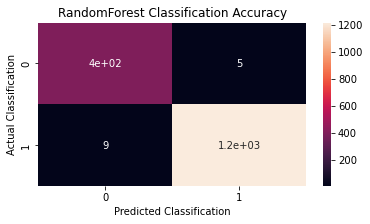

In [34]:
# Creating a confusion Matrix
rfc_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score= True)
rfc_model.fit(X_train, y_train)
y_predicted_rfc = rfc_model.predict(X_test)
print("Accuracy on  RandomForest Classifier test data: {:.2f} %".format(rfc_model.score(X_test, y_test)*100))
cm = confusion_matrix(y_test, y_predicted_rfc)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('RandomForest Classification Accuracy')
plt.show()

## Comments
#### Given that using GridsearchCV with Hyperparameter tuning is computionally intensive, the utilization of less predictor feature variables becomes more useful, especially since it is recommended to use sqrt of total predictor feature variables for Random Forest. This also confirms that random forest is an optimal classifier for our model, as we get a near perfect test accuracy.